# 15회차: DNN-GAN을 활용한 손글씨 모방하기 (1) - 이론 및 데이터 분석


In [1]:
# 시각화 준비
!pip install koreanize_matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# 1. MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. 데이터 기본 정보 출력
print("훈련 데이터 shape:", x_train.shape)   # (60000, 28, 28)
print("테스트 데이터 shape:", x_test.shape)  # (10000, 28, 28)
print("훈련 레이블 개수:", len(y_train))

# 3. 레이블 통계 확인
label_counts = Counter(y_train)
print("\n클래스별 샘플 수:")
for label, count in sorted(label_counts.items()):
    print(f"숫자 {label}: {count}개")

훈련 데이터 shape: (60000, 28, 28)
테스트 데이터 shape: (10000, 28, 28)
훈련 레이블 개수: 60000

클래스별 샘플 수:
숫자 0: 5923개
숫자 1: 6742개
숫자 2: 5958개
숫자 3: 6131개
숫자 4: 5842개
숫자 5: 5421개
숫자 6: 5918개
숫자 7: 6265개
숫자 8: 5851개
숫자 9: 5949개


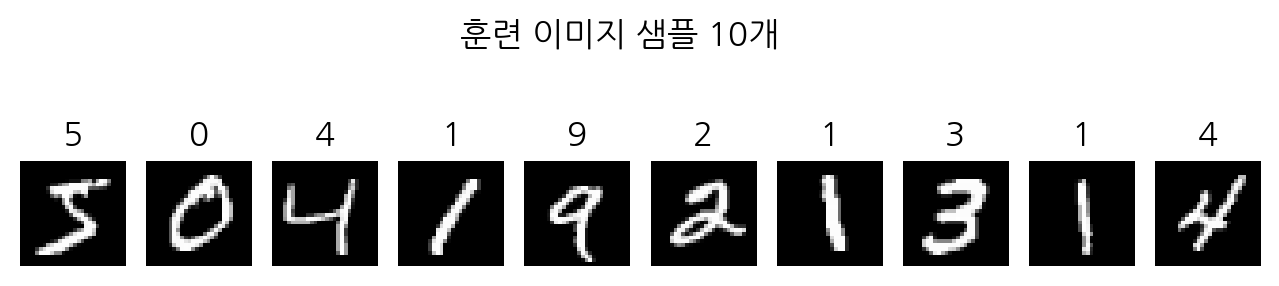

In [ ]:
# 4. 학습 데이터 숫자 이미지 10개 출력
plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.suptitle("훈련 이미지 샘플 10개")
plt.show()

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

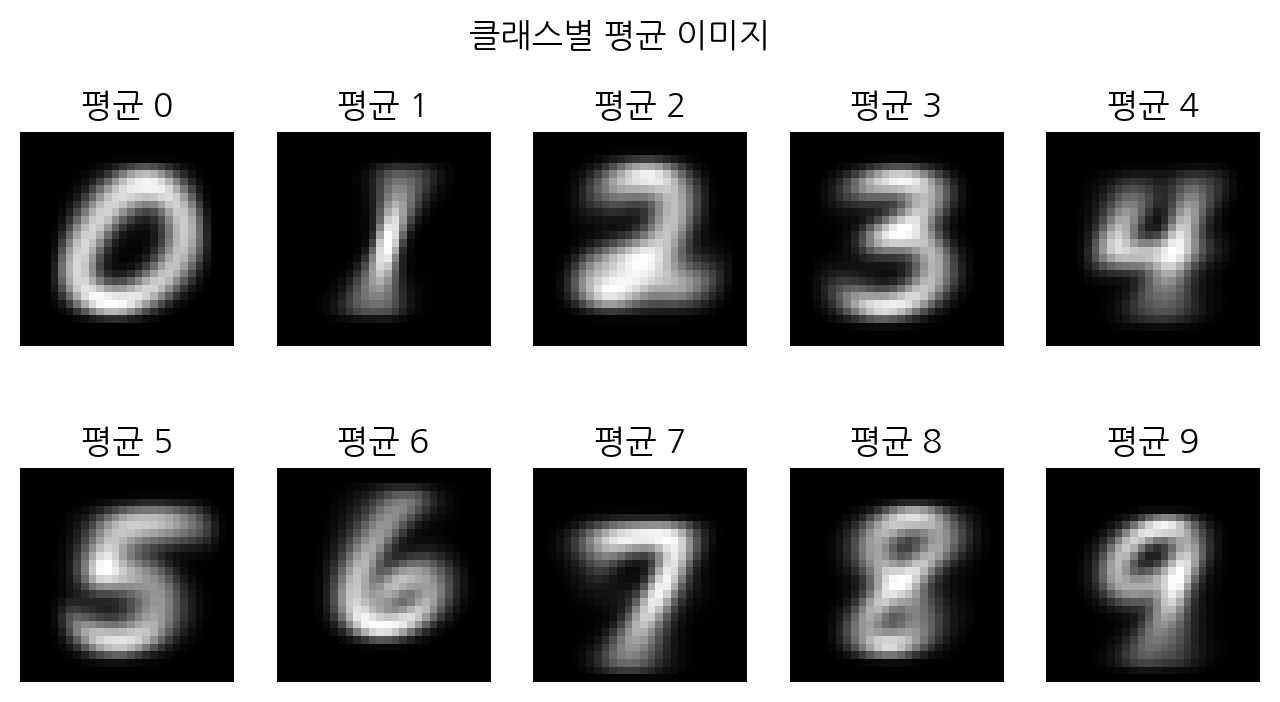

In [ ]:
# 5. 각 숫자 클래스별 평균 이미지 시각화
plt.figure(figsize=(8, 4))
for digit in range(10):
    indices = np.where(y_train == digit)[0]
    avg_image = np.mean(x_train[indices], axis=0)

    plt.subplot(2, 5, digit + 1)
    plt.imshow(avg_image, cmap='gray')
    plt.title(f"평균 {digit}")
    plt.axis('off')
plt.suptitle("클래스별 평균 이미지")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# MNIST 데이터 불러오기
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# 1. 임의로 숫자 7만 뽑아보자
digit = 7

# 2. y_train에서 값이 7인 인덱스만 뽑기
indices = np.where(y_train == digit)[0]
print(f"숫자 {digit}의 이미지 개수: {len(indices)}개")
indices[:5]

숫자 7의 이미지 개수: 6265개


array([15, 29, 38, 42, 52])

In [ ]:
x_train[indices[:5]].shape

(5, 28, 28)

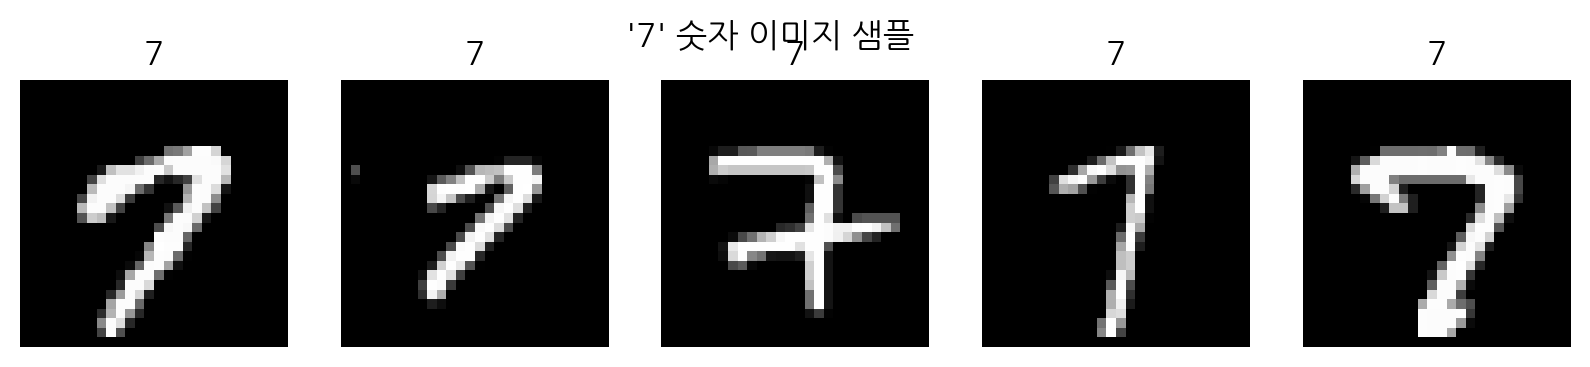

In [ ]:
# 3. 그 중 5개만 시각화해서 확인
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[indices[i]], cmap='gray')
    plt.title(f"{digit}")
    plt.axis('off')
plt.suptitle(f"'{digit}' 숫자 이미지 샘플")
plt.show()

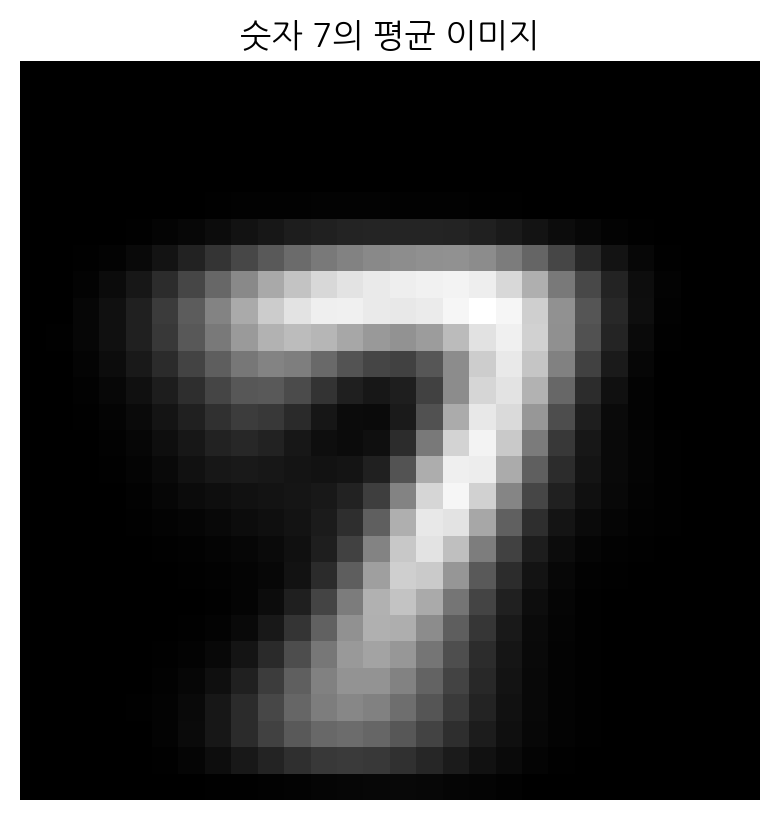

In [ ]:
# 4. 평균 이미지 만들기
avg_image = np.mean(x_train[indices], axis=0)

# 5. 평균 이미지 시각화
plt.imshow(avg_image, cmap='gray')
plt.title(f"숫자 {digit}의 평균 이미지")
plt.axis('off')
plt.show()

## 전체 코드

훈련 데이터 shape: (60000, 28, 28)
테스트 데이터 shape: (10000, 28, 28)
훈련 레이블 개수: 60000

클래스별 샘플 수:
숫자 0: 5923개
숫자 1: 6742개
숫자 2: 5958개
숫자 3: 6131개
숫자 4: 5842개
숫자 5: 5421개
숫자 6: 5918개
숫자 7: 6265개
숫자 8: 5851개
숫자 9: 5949개


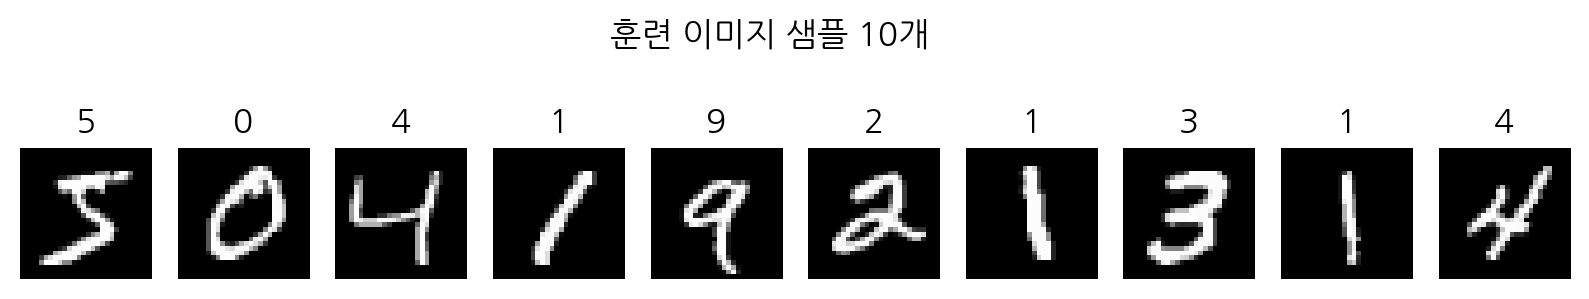

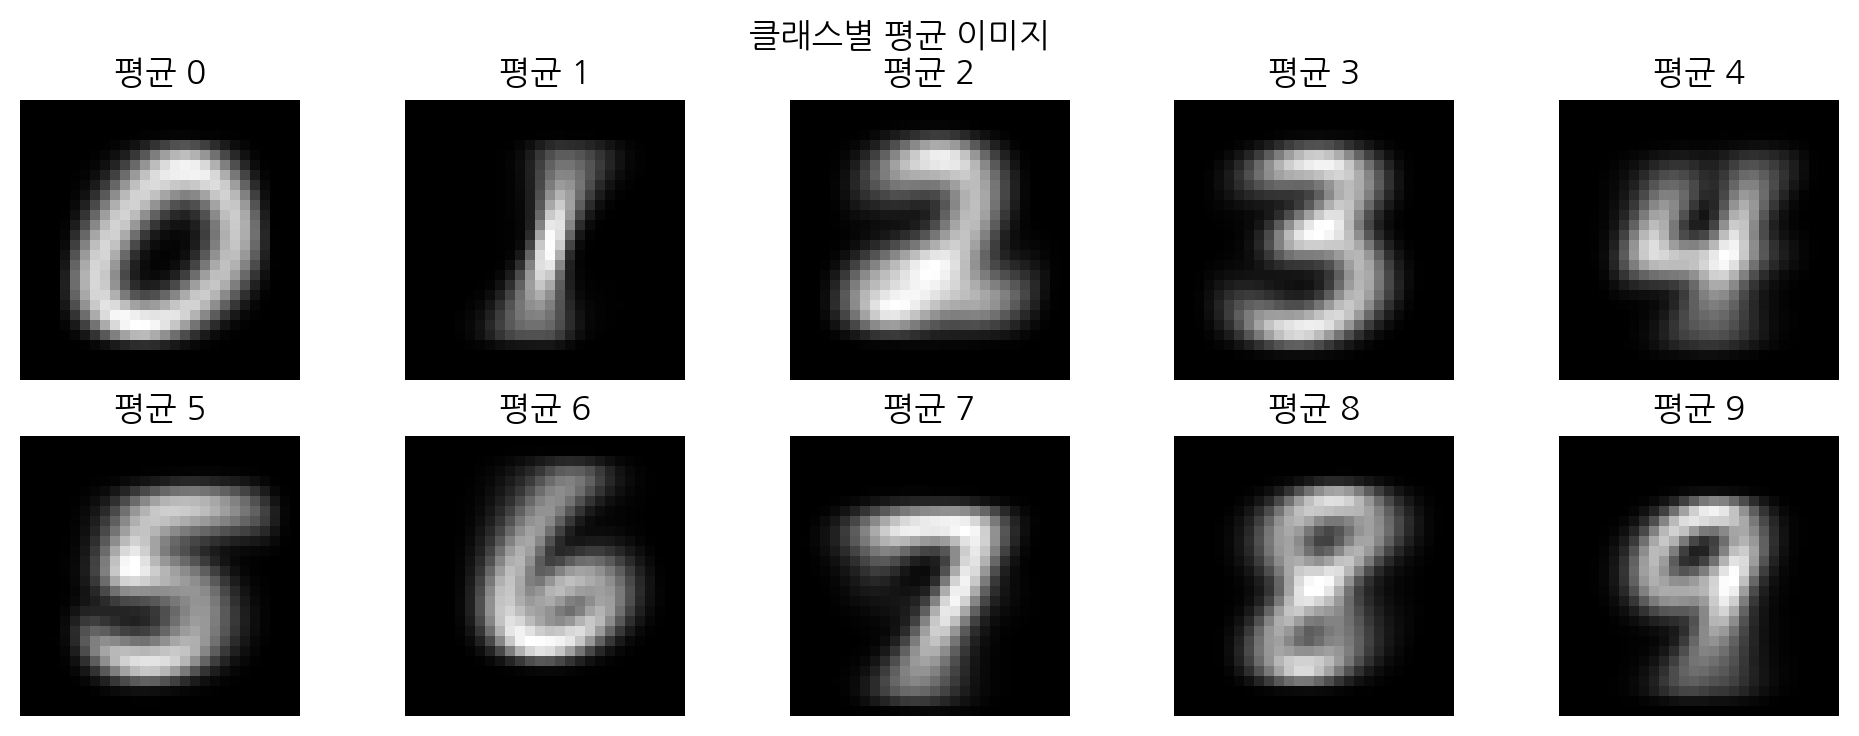

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# 1. MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. 데이터 기본 정보 출력
print("훈련 데이터 shape:", x_train.shape)   # (60000, 28, 28)
print("테스트 데이터 shape:", x_test.shape)  # (10000, 28, 28)
print("훈련 레이블 개수:", len(y_train))

# 3. 레이블 통계 확인
label_counts = Counter(y_train)
print("\n클래스별 샘플 수:")
for label, count in sorted(label_counts.items()):
    print(f"숫자 {label}: {count}개")

# 4. 임의의 숫자 이미지 10개 출력
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.suptitle("훈련 이미지 샘플 10개")
plt.show()

# 5. 각 숫자 클래스별 평균 이미지 시각화
plt.figure(figsize=(12, 4))
for digit in range(10):
    indices = np.where(y_train == digit)[0]
    avg_image = np.mean(x_train[indices], axis=0)

    plt.subplot(2, 5, digit + 1)
    plt.imshow(avg_image, cmap='gray')
    plt.title(f"평균 {digit}")
    plt.axis('off')
plt.suptitle("클래스별 평균 이미지")
plt.show()

## 심화 학습

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
숫자 7의 이미지 개수: 6265개


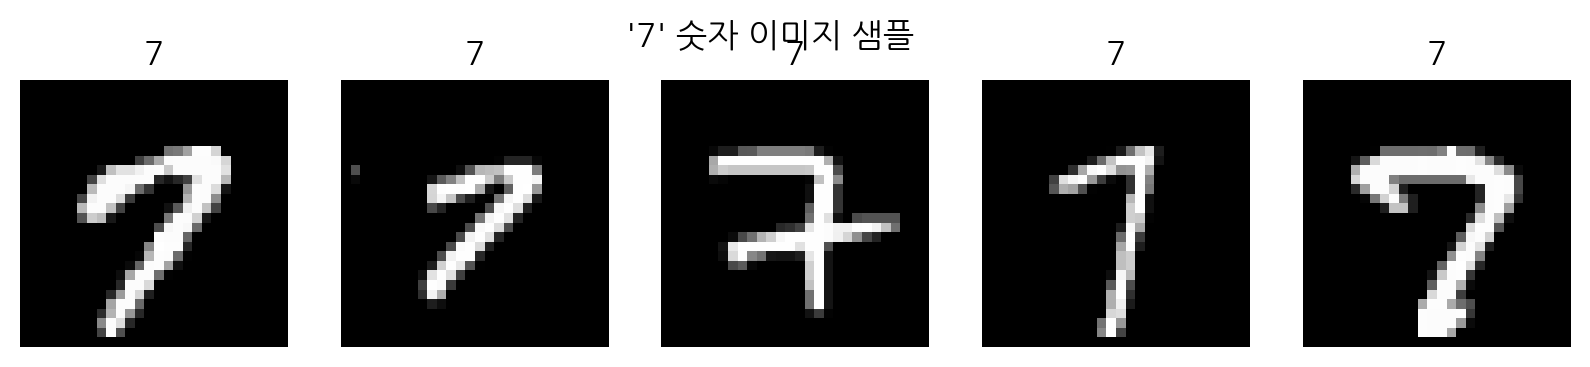

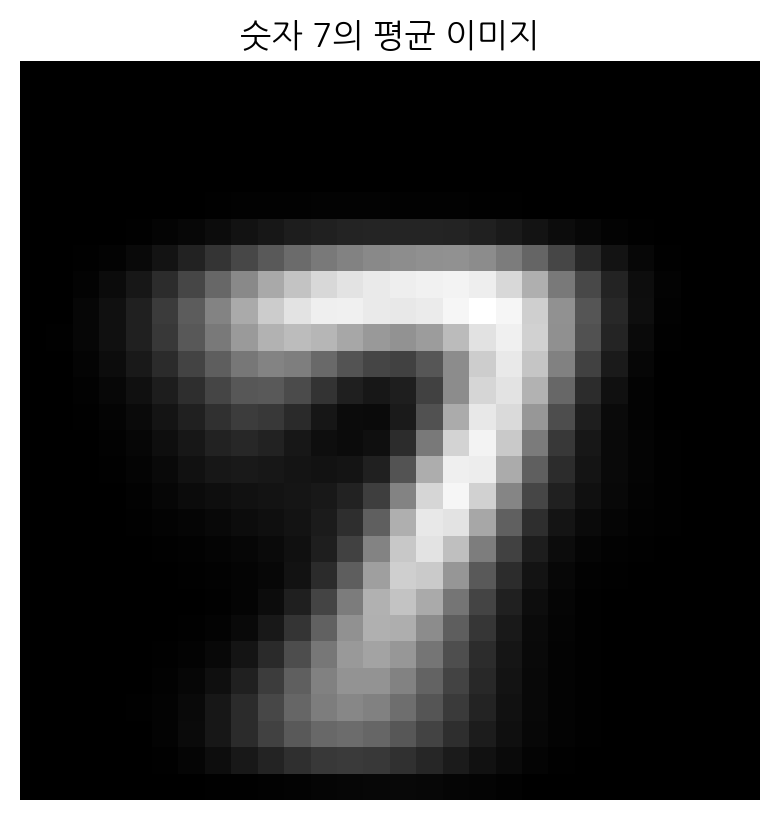

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# MNIST 데이터 불러오기
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# 1. 임의로 숫자 7만 뽑아보자
digit = 7

# 2. y_train에서 값이 7인 인덱스만 뽑기
indices = np.where(y_train == digit)[0]
print(f"숫자 {digit}의 이미지 개수: {len(indices)}개")

# 3. 그 중 5개만 시각화해서 확인
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[indices[i]], cmap='gray')
    plt.title(f"{digit}")
    plt.axis('off')
plt.suptitle(f"'{digit}' 숫자 이미지 샘플")
plt.show()

# 4. 평균 이미지 만들기
avg_image = np.mean(x_train[indices], axis=0)

# 5. 평균 이미지 시각화
plt.imshow(avg_image, cmap='gray')
plt.title(f"숫자 {digit}의 평균 이미지")
plt.axis('off')
plt.show()

## 종료